In [77]:
import pyodbc
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
conn = pyodbc.connect('Driver={SQL Server};''Server=sqlcovid19.database.windows.net;''Database=DB_COVID_NINETEEN;''UID=datarangers;''PWD=data_rangers19')

In [48]:
query_covid = 'SELECT * FROM COUNTRY_COVID_DAILY_CASES'
query_country = 'SELECT * FROM COUNTRY'

In [49]:
df_data = pd.read_sql(query_covid,conn)
df_country = pd.read_sql(query_country,conn)

In [50]:
with conn1:
    crs = conn1.cursor()
    crs.close()

In [51]:
df_geral = pd.merge(df_data, df_country, left_on='ID_COUNTRY', right_on='ID')
df_geral.drop(['ID_x', 'ID_y', 'ISO2', 'SLUG'], axis = 1) 
df_geral = df_geral[['DATE','ID_COUNTRY', 'NAME', 'ID_CASE_TYPE', 'TOTAL_CASES']]
df_geral.head()

,DATE,ID_COUNTRY,NAME,ID_CASE_TYPE,TOTAL_CASES
0,2020-01-22,1,Albania,1,0
1,2020-01-22,1,Albania,2,0
2,2020-02-01,1,Albania,1,0
3,2020-02-01,1,Albania,2,0
4,2020-02-11,1,Albania,1,0


In [52]:
df_geral['DATE'] = pd.to_datetime(df_geral['DATE'], infer_datetime_format=True)
df_geral.set_index('DATE', inplace=True)

Dataframes auxiliares para questões 1 e 2

In [132]:
df_casos = df_geral.loc[df_geral['ID_CASE_TYPE'] == 1, :]
df_mortes = df_geral.loc[df_geral['ID_CASE_TYPE'] == 2, :]

In [144]:
top_casos = df_casos.groupby(['NAME'])['TOTAL_CASES'].agg(['sum']).sort_values('sum', ascending=False).head(10).index.to_list()
top_mortes = df_mortes.groupby(['NAME'])['TOTAL_CASES'].agg(['sum']).sort_values('sum', ascending=False).head(10).index.to_list()

# 1) Panorama diário de quantidade de casos confirmados de COVID-19 dos 10 países do mundo com maiores números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

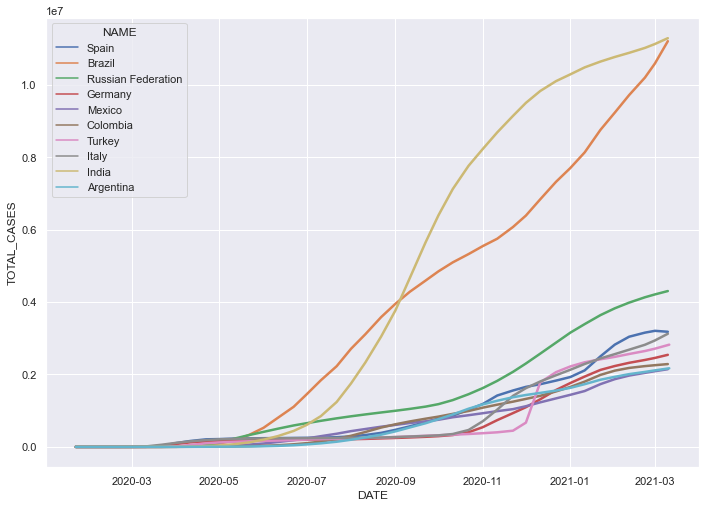

In [142]:
df_q1 = df_casos.loc[df_casos['NAME'].isin(top_casos), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q1)

# 2) Panorama diário de quantidade de mortes de COVID-19 dos 10 países do mundo com números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

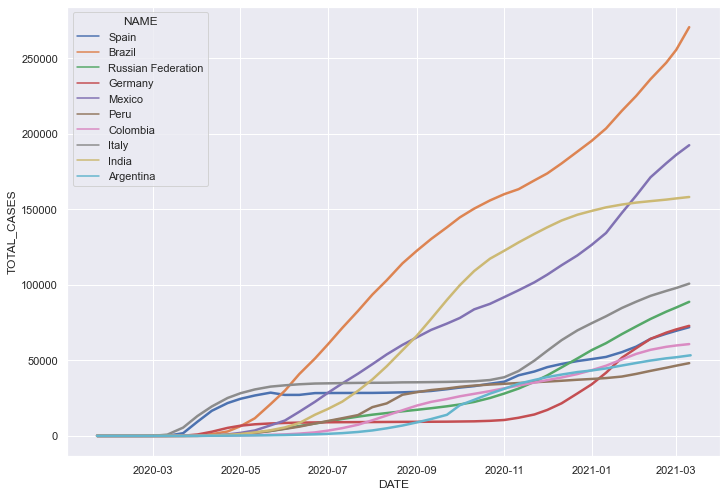

In [145]:
df_q2 = df_mortes.loc[df_mortes['NAME'].isin(top_mortes), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q2)

# 3) Total de mortes por COVID-19 dos 10 países do mundo com maiores números.

In [147]:
df_mortes.groupby(['NAME'])['TOTAL_CASES'].agg(['sum']).sort_values('sum', ascending=False).head(10)

,sum
NAME,
Brazil,4417602
India,2853976
Mexico,2714925
Italy,1720433
Spain,1324635
Russian Federation,1052322
Peru,873227
Colombia,861982
Argentina,744860


# 4) Total de casos confirmados por COVID-19 dos 10 países do mundo com maiores números.

In [148]:
df_casos.groupby(['NAME'])['TOTAL_CASES'].agg(['sum']).sort_values('sum', ascending=False).head(10)

,sum
NAME,
India,188328208
Brazil,159529891
Russian Federation,58083193
Spain,39388714
Italy,34903267
Colombia,31010082
Turkey,30301233
Argentina,29349917
Mexico,28804816
